In [78]:
import pandas as pd
from pandas import Series, DataFrame

In [83]:
t_df = pd.read_csv('train.csv')

In [3]:
t_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
'タイタニック号の乗客はどのような人たちだったのか'

'タイタニック号の乗客はどのような人たちだったのか'

In [10]:
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

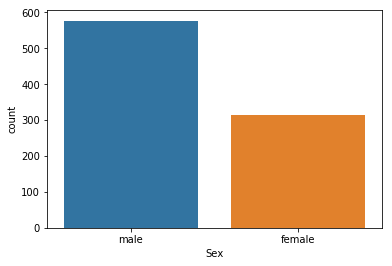

In [12]:
sns.countplot('Sex',data=t_df)

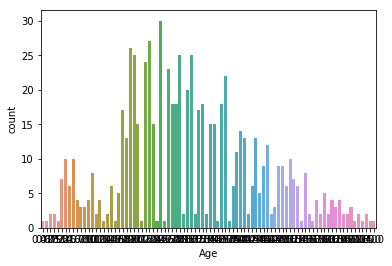

In [13]:
sns.countplot('Age',data=t_df)

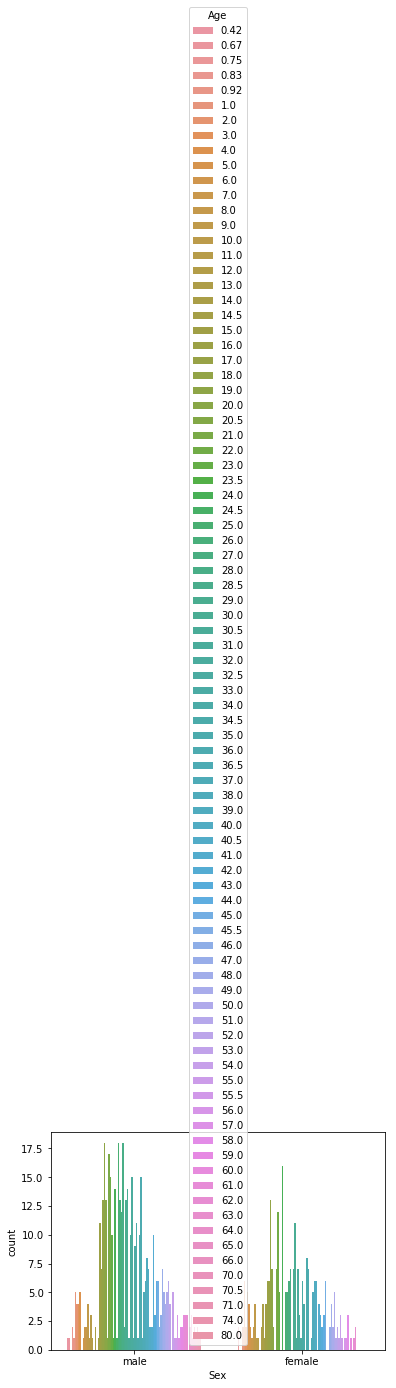

In [14]:
sns.countplot('Sex',data=t_df,hue='Age')

In [104]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

t_df['person'] = t_df[['Age','Sex']].apply(male_female_child, axis=1)

In [21]:
t_df['person'].head

<bound method NDFrame.head of 0        male
1      female
2      female
3      female
4        male
5        male
6        male
7       child
8      female
9       child
10      child
11     female
12       male
13       male
14      child
15     female
16      child
17       male
18     female
19     female
20       male
21       male
22      child
23       male
24      child
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869     child
870      male
871    female
872      male
873      male
874    female
875     child
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: person, Length: 891, dtype: object>

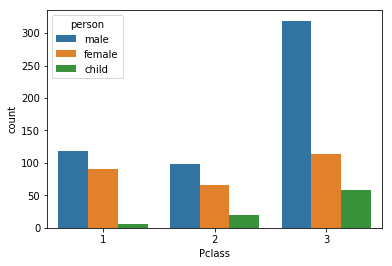

In [23]:
sns.countplot('Pclass',data= t_df,hue='person')

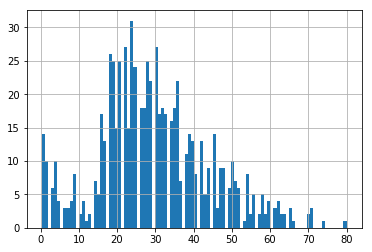

In [28]:
t_df['Age'].hist(bins=100)

In [29]:
t_df['Age'].mean()

29.69911764705882

/Users/shin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


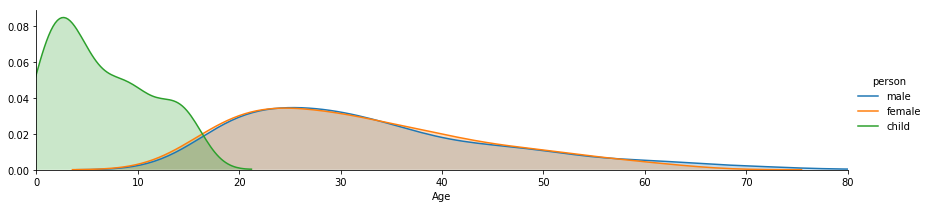

In [36]:
fig = sns.FacetGrid(t_df, hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = t_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

/Users/shin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


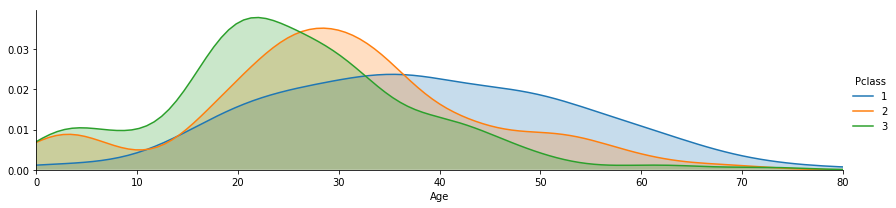

In [37]:
fig = sns.FacetGrid(t_df, hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = t_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [38]:
t_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [39]:
deck = t_df['Cabin'].dropna()

In [40]:
deck.head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

In [43]:
levels = []
for level in deck:
    levels.append(level[0])

In [46]:
cabin_df = DataFrame(levels)
cabin_df.columns = ["Cabin"]

In [47]:
cabin_df

,Cabin
0,C
1,C
2,E
3,G
4,C
5,D
6,A
7,C
8,B
9,D


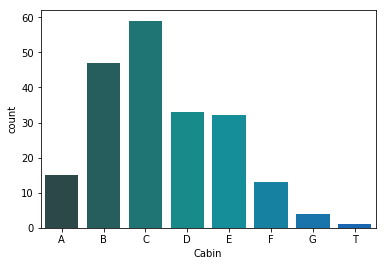

In [51]:
sns.countplot('Cabin',data=cabin_df,palette='winter_d',order=sorted(set(levels)))

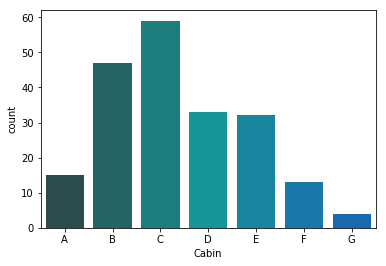

In [56]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin',data=cabin_df,palette='winter_d',order=sorted(set(cabin_df.Cabin)))

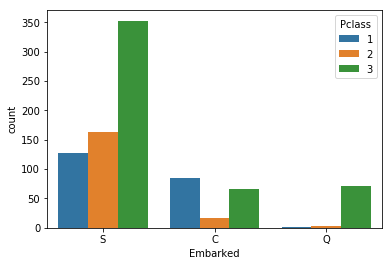

In [60]:
sns.countplot("Embarked",data=t_df,hue="Pclass")

In [61]:
from collections import Counter

In [64]:
Counter(t_df.Embarked)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [116]:
t_df["Alone"] = t_df.Parch + t_df.SibSp
t_df["Alone"].loc[t_df["Alone"] > 0] = "With Family"
t_df["Alone"].loc[t_df["Alone"] == 0] = "Alone"

/Users/shin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


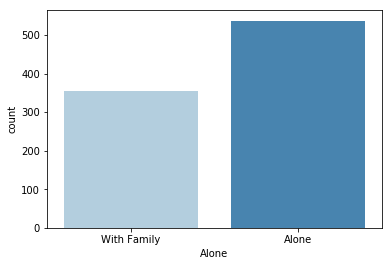

In [73]:
sns.countplot("Alone",data=t_df,palette="Blues")

In [90]:
t_df["Survivor"] = t_df.Survived.map({0: "no", 1: "yes"})

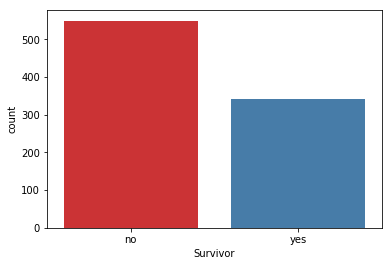

In [95]:
sns.countplot("Survivor",data=t_df,palette="Set1")

/Users/shin/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/shin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


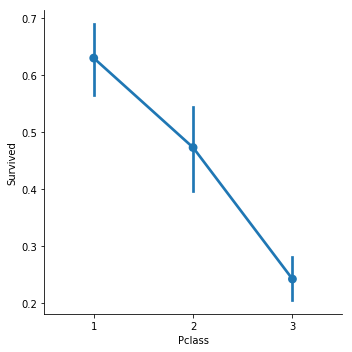

In [100]:
sns.factorplot("Pclass","Survived",data=t_df,order=[1,2,3])

/Users/shin/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/shin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


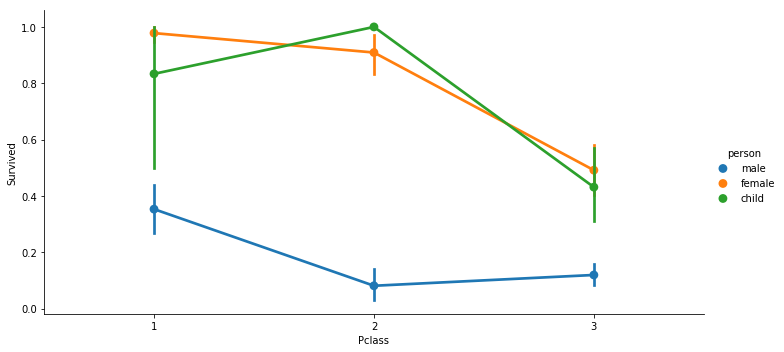

In [106]:
sns.factorplot("Pclass","Survived",hue="person",data=t_df,order=[1,2,3],aspect=2)

/Users/shin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


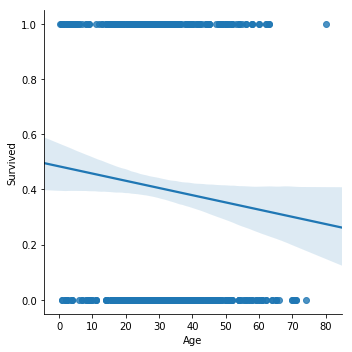

In [109]:
sns.lmplot("Age","Survived",data=t_df)

/Users/shin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


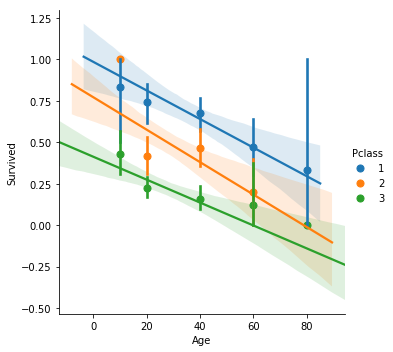

In [112]:
generations = [10,20,40,60,80]
sns.lmplot("Age","Survived",hue="Pclass",data=t_df,x_bins=generations)

/Users/shin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


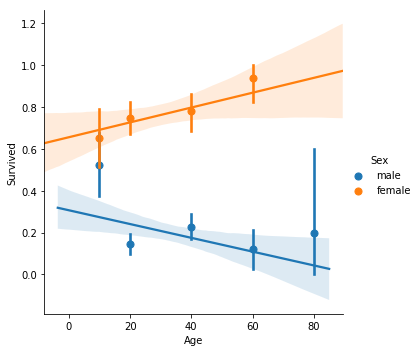

In [113]:
sns.lmplot("Age","Survived",hue="Sex",data=t_df,x_bins=generations)

/Users/shin/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/shin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


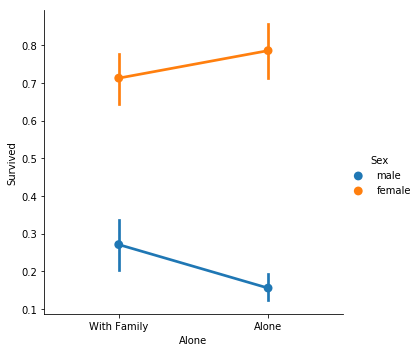

In [122]:
sns.factorplot("Alone","Survived",hue="Sex",data=t_df,x_bins=generations)